In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [54]:
stock = 'XXX'  data = pd.DataFrame()
data["Adj Close"] = yf.download(stock, '2015-07-02', '2023-07-31')['Adj Close']

#Calculate moving average, exponential moving avg might yield better results to a more volatile instrument 
ma = 21
data['MA'] = data.rolling(ma).mean()
data['Returns'] = np.log(data["Adj Close"]).diff()
data["Ratio"] = data["Adj Close"] / data["MA"]
data["Ratio"].describe()

[*********************100%%**********************]  1 of 1 completed


count    569.000000
mean       0.990937
std        0.119731
min        0.601852
25%        0.909254
50%        0.984720
75%        1.060724
max        1.436559
Name: Ratio, dtype: float64

In [55]:
percentiles = [5, 10, 50, 90, 95]
p = np.percentile(data["Ratio"].dropna(), percentiles)

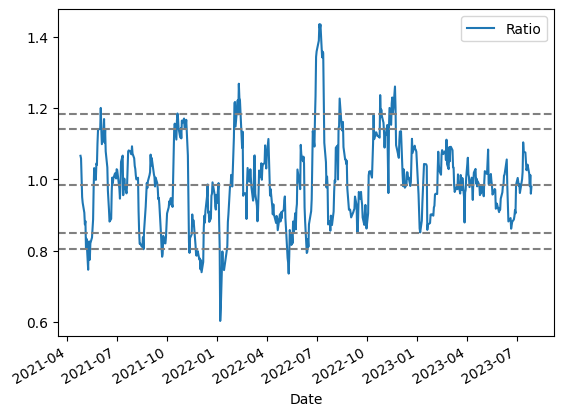

In [56]:
data["Ratio"].dropna().plot(legend = True)
plt.axhline(p[0], c =( .5,.5,.5), ls = "--")
plt.axhline(p[-1], c =( .5,.5,.5), ls = "--")
plt.axhline(p[2], c =( .5,.5,.5), ls = "--")
plt.axhline(p[1], c =( .5,.5,.5), ls = "--")
plt.axhline(p[3], c =( .5,.5,.5), ls = "--")

In [57]:
#Signals, note that the model will always hold a position
short, long = p[-1], p[0]
data["position"] = np.where(data.Ratio> short,-1, np.nan)
data["position"] = np.where(data.Ratio< long,1, data['position'])
data['position'] = data['position'].ffill()

In [58]:
data.sample(10)

,Adj Close,MA,Returns,Ratio,position
Date,,,,,
2022-05-16,11.050000,13.547143,-0.065669,0.815670,1.0
2021-11-19,25.660000,29.377619,-0.021208,0.873454,1.0
2022-11-30,23.830000,21.000952,0.035016,1.134710,-1.0
2022-07-27,13.850000,15.421428,0.054147,0.898101,-1.0
2023-07-13,20.340000,18.419524,0.075016,1.104263,-1.0
2021-04-05,37.040001,NaN,-0.004310,NaN,NaN
2021-12-01,19.670000,26.326667,-0.063521,0.747151,1.0
2023-01-31,19.580000,21.258095,0.012333,0.921061,-1.0
2021-05-06,29.655001,36.707857,-0.098356,0.807865,NaN


In [59]:
data['strategy returns'] = data["Returns"] * data['position'].shift()  #shift to stop lookahead bias

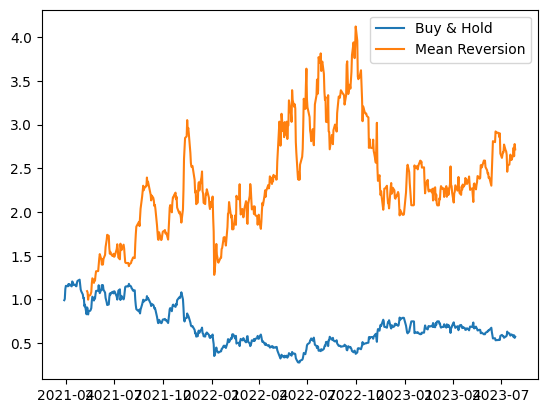

In [60]:
plt.plot(np.exp(data["Returns"].dropna()).cumprod(), label = "Buy & Hold")
plt.plot(np.exp(data["strategy returns"].dropna()).cumprod(), label = "Mean Reversion")
plt.legend()


In [62]:
print("Buy & Hold: " + str(np.exp(data["Returns"].dropna()).cumprod()[-1]-1))
print("Mean Reverting: " + str(np.exp(data["strategy returns"].dropna()).cumprod()[-1]-1))

Buy & Hold: -0.4279503217436431
Mean Reverting: 1.7178933463682764


/var/folders/w_/b3w196fd4k174fs2tf9mr6lh0000gn/T/ipykernel_34208/846015871.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Buy & Hold: " + str(np.exp(data["Returns"].dropna()).cumprod()[-1]-1))
/var/folders/w_/b3w196fd4k174fs2tf9mr6lh0000gn/T/ipykernel_34208/846015871.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Mean Reverting: " + str(np.exp(data["strategy returns"].dropna()).cumprod()[-1]-1))


In [ ]:
#